In [3]:
#pip install imbalanced-learn

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
# Generate a synthetic imbalanced dataset
X, y = make_classification(
    n_samples   = 1000, 
    n_features  = 20, 
    n_classes   = 2, 
    weights     = [0.9, 0.1],  # 90% of one class and 10% of the other
    flip_y      = 0, 
    random_state= 42
)

In [5]:
# Check original class distribution
print("Original class distribution:", Counter(y))

Original class distribution: Counter({0: 900, 1: 100})


In [6]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
# Check new class distribution
print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({0: 900, 1: 900})


In [8]:
# Visualize original and resampled datasets (for 2D data)
def plot_2d_scatter(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.5)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

In [9]:
# Reduce dimensionality for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
X_resampled_2d = pca.transform(X_resampled)

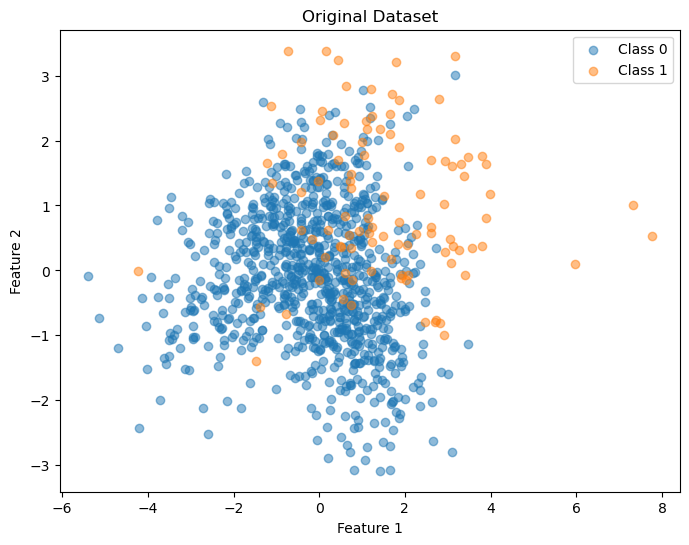

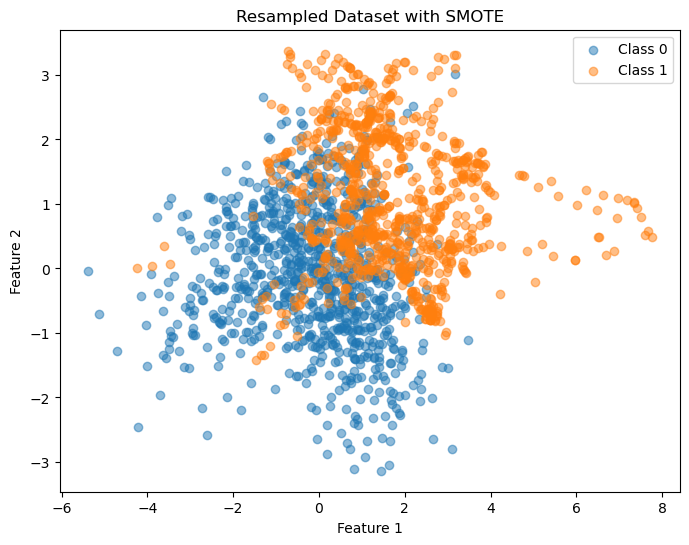

In [10]:
# Plot original and resampled datasets
plot_2d_scatter(X_2d, y, 'Original Dataset')
plot_2d_scatter(X_resampled_2d, y_resampled, 'Resampled Dataset with SMOTE')

#### 1. Import Required Libraries

You need libraries like `numpy`, `matplotlib`, and `imblearn` for data manipulation and visualization. `imblearn` provides the `SMOTE` class for oversampling.

#### 2. Generate an Imbalanced Dataset

You can create a synthetic dataset with imbalanced classes using functions like `make_classification` from `sklearn`. For example, a dataset might have 90% of samples in one class and 10% in another.

#### 3. Visualize the Original Dataset

Before applying SMOTE, visualize the original dataset to understand the class distribution. Typically, you will see a large imbalance between the majority and minority classes.

#### 4. Apply SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic samples for the minority class to balance the dataset. It works by creating new samples along the line segments between existing minority class samples and their neighbors.

#### 5. Visualize the Resampled Dataset

After applying SMOTE, visualize the dataset again to see how the class distribution has changed. The resampled dataset should show a more balanced distribution between classes.

#### 6. Understanding How SMOTE Works

1. **Finding Neighbors:** For each minority class sample, SMOTE identifies `k` nearest neighbors.

2. **Generating Synthetic Samples:** New synthetic samples are generated by interpolating between the original minority sample and its neighbors. This involves creating new samples along the line segments connecting the original sample to its neighbors.

3. **Balancing the Dataset:** By adding these synthetic samples, SMOTE helps to balance the class distribution. The resulting dataset has a more equal representation of both classes, which can improve the performance of machine learning models on imbalanced data.

By using SMOTE, you can address the issue of class imbalance and enhance the performance of models that are sensitive to imbalanced datasets.
